<a href="https://colab.research.google.com/github/gulugulu2042/EDA/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis** - BCSE331L
# Gokularajan R
22BDS0137

Given dataset : Diabetes


## Importing and viewing data

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/diabetes.csv")

In [69]:
df.shape

(768, 9)

In [70]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    float64
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 54.1+ KB


In [72]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35,0,33.6,0.627,50,1
1,1.0,85,66,29,0,26.6,0.351,31,0
2,8.0,183,64,0,0,23.3,0.672,32,1
3,1.0,89,66,23,94,28.1,0.167,21,0
4,0.0,137,40,35,168,43.1,2.288,33,1


In [73]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10.0,101,76,48,180,32.9,0.171,63,0
764,2.0,122,70,27,0,36.8,0.340,27,0
765,5.0,121,72,23,112,26.2,0.245,30,0
766,1.0,126,60,0,0,30.1,0.349,47,1
767,1.0,93,70,31,0,30.4,0.315,23,0


In [74]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,767.000000,768.000000,768.000000,768.000000,768.000000,768.000000,767.000000,768.000000
mean,3.850065,120.894531,69.105469,20.536458,79.799479,31.992578,0.471995,33.240885
std,3.368910,31.972618,19.355807,15.952218,115.244002,7.884160,0.331529,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.371000,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626500,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


## Checking for Null values and cleaning

In [75]:
df.isnull().sum()

,0
Pregnancies,1
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,1
Age,0
Outcome,0


In [76]:
df.dropna(inplace=True) #Only 2 rows with null values
len(df)

766

In [77]:
list_0 = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
(df[list_0] == 0).sum()

,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11


Upon some research in the domain, we see that a 0 in the features :

glucose (Acceptable range : <200),

Blood pressure (only diastolic - Acceptable range : 60-180),

Skin Thickness (in mm),

Insulin (2 hrs after glucose administration - healthy range : 16-166),

BMI


is highly improbable and is possibly incorrect data. We need to clean this before further analysis. We can visualise the 0 outliers using a box plot wwith restricted whisker size


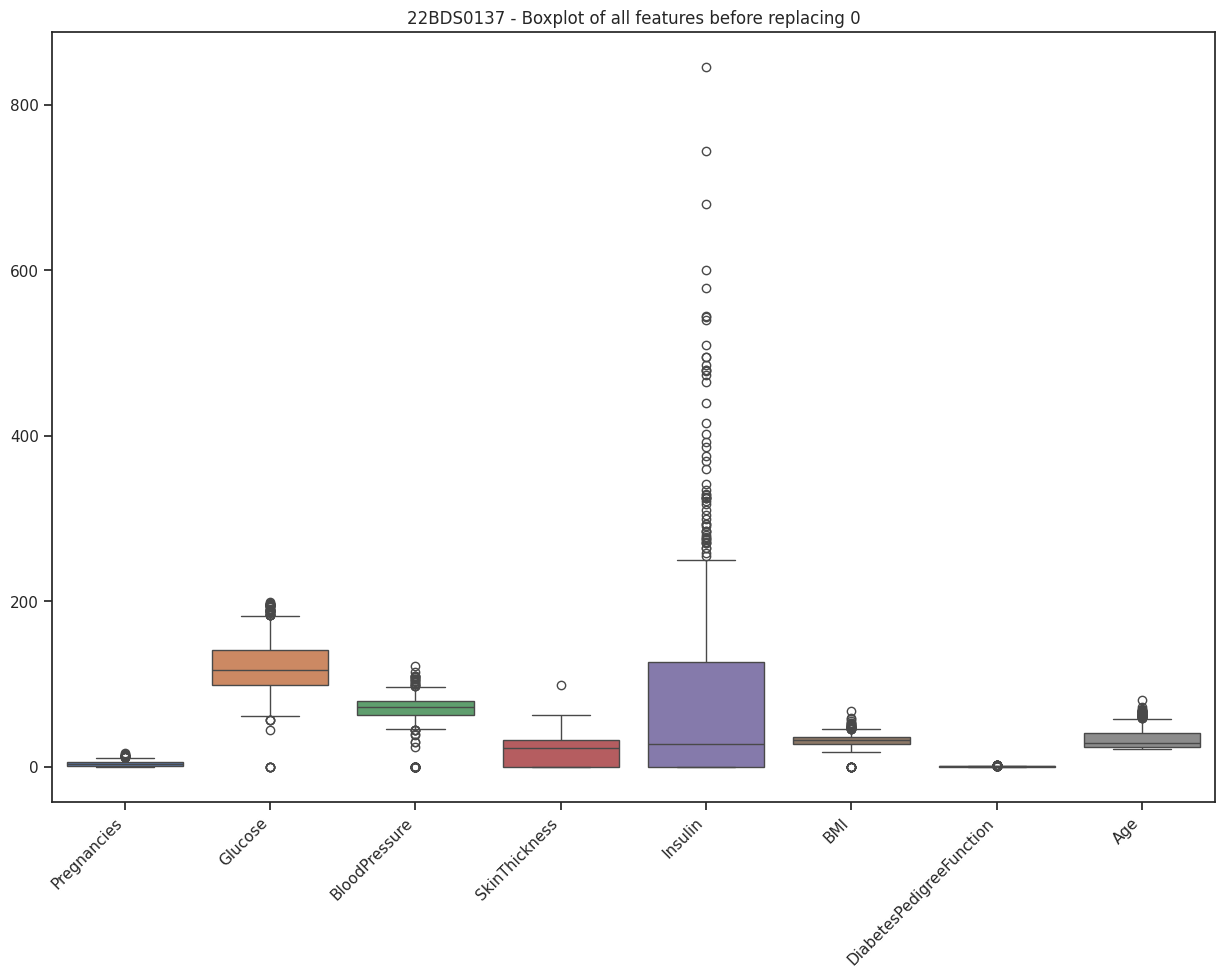

In [78]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, whis=1) # using whiskers restricted to 1*IQR to represent outliers with value 0
# Given dataset has minimal variance and only through limiting whiskers we can visualise 0-outliers
# even then, features like skin thickness have so much 0-outliers that 0 itself is the 25th percentile
plt.xticks(rotation=45, ha='right')
plt.title('22BDS0137 - Boxplot of all features before replacing 0')
plt.show()

In [79]:
means = df[list_0].mean()
df[list_0]=df[list_0].replace(0, means)

#Replaced all 0's with corresponding feature's mean
(df[list_0] == 0).sum()

,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0


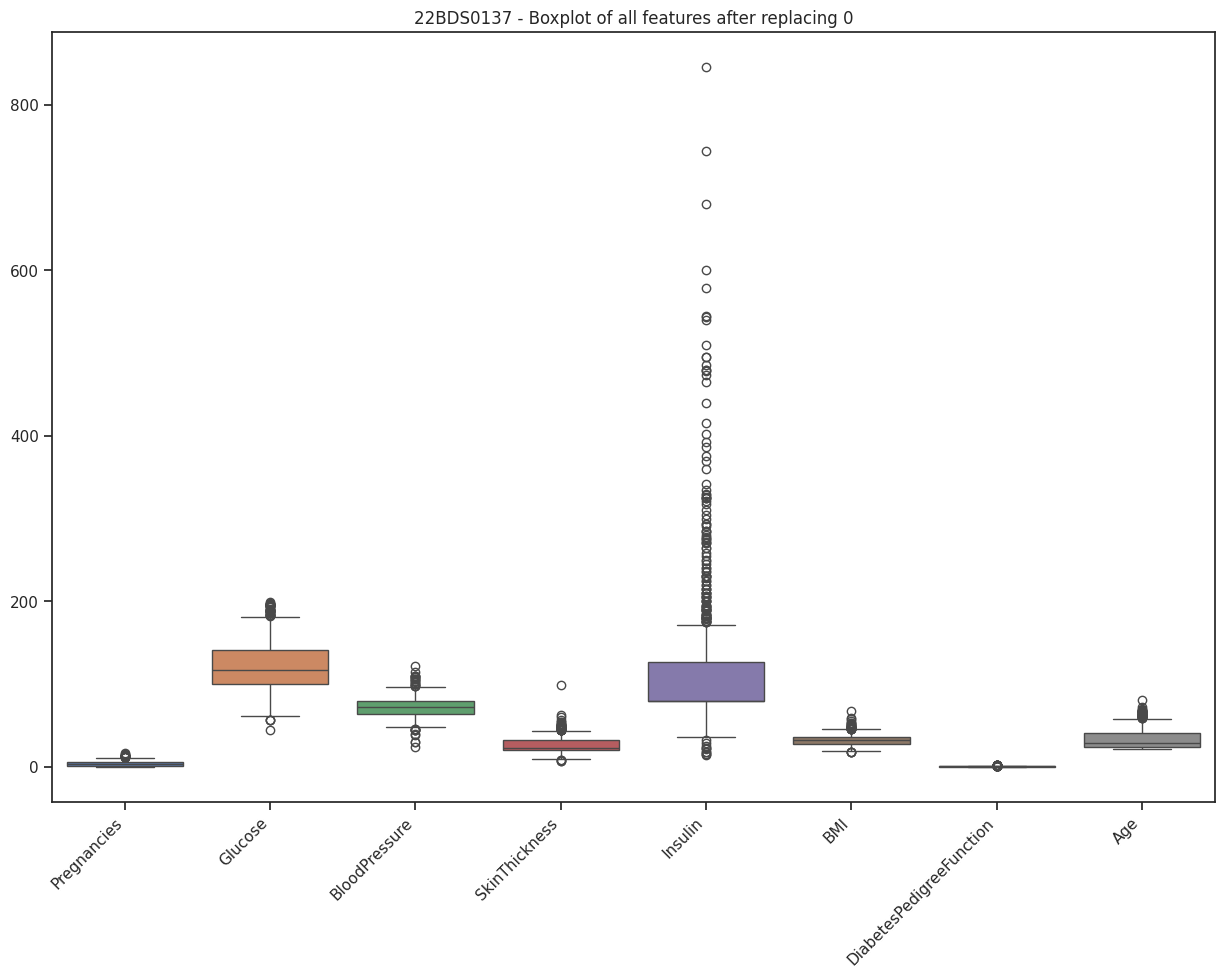

In [80]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, whis=1)
plt.xticks(rotation=45, ha='right')
plt.title('22BDS0137 - Boxplot of all features after replacing 0')
plt.show()

In [81]:
(df == '?').sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,3


In [82]:
# Removing rows where outcome is ?
df = df[df['Outcome'] != '?']


In [83]:
df.dtypes #Outcome is a string of 1/0

,0
Pregnancies,float64
Glucose,float64
BloodPressure,float64
SkinThickness,float64
Insulin,float64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,object


In [84]:
df["Outcome"] = df["Outcome"].astype(int)

<ipython-input-84-c2fab3fcdade>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Outcome"] = df["Outcome"].astype(int)


## Univariate Analysis


In [85]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,3.858453,121.817628,72.284455,26.609469,118.637794,32.451838,0.472046,33.285714,0.349934
std,3.369368,30.467226,12.136878,9.659363,93.327526,6.890489,0.332054,11.782016,0.477262
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,20.515666,79.613577,27.500000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.613577,32.000000,0.370000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,127.500000,36.600000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [86]:
#Computing IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

,0
Pregnancies,5.000000
Glucose,41.000000
BloodPressure,16.000000
SkinThickness,11.484334
Insulin,47.886423
BMI,9.100000
DiabetesPedigreeFunction,0.383000
Age,17.000000
Outcome,1.000000


<Axes: title={'center': '22BDS0137 - Outcome pie chart'}, ylabel='count'>

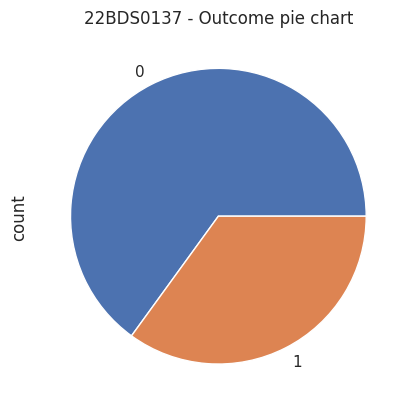

In [87]:
df.Outcome.value_counts().plot(kind = "pie", title="22BDS0137 - Outcome pie chart")

<ipython-input-88-a57f24d06a69>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p3 = sns.distplot(df.BloodPressure, kde=True, ax = axes[1,0])
<ipython-input-88-a57f24d06a69>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p4 = sns.distplot(df.Glucose, kde=True, ax = axes[1,1])
<ipython-input-88-a57f24d06a69>:9: UserWar

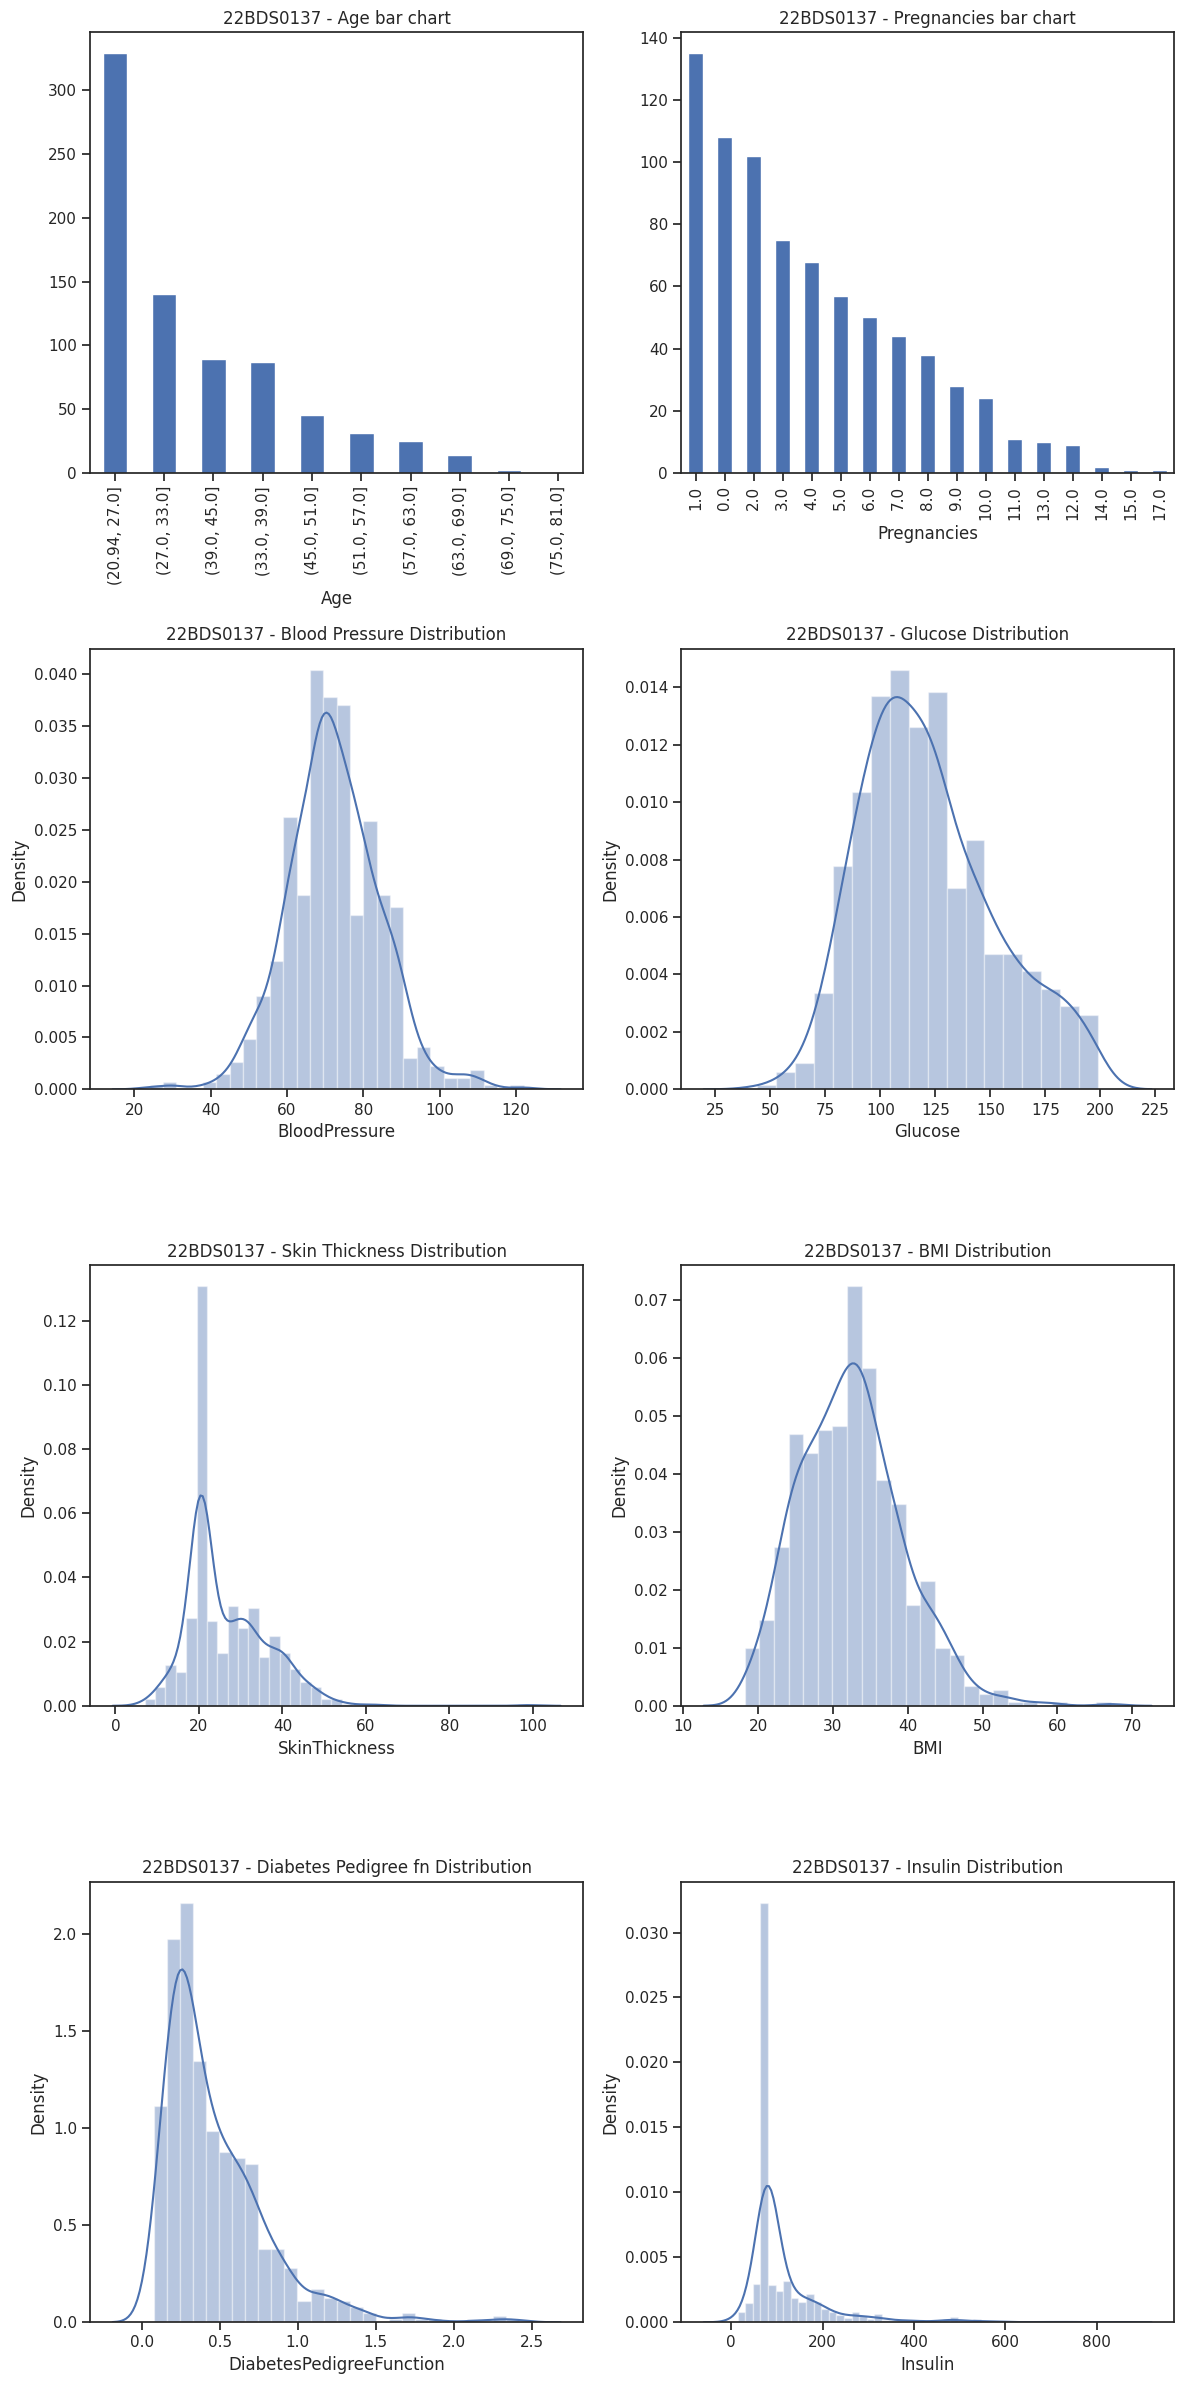

In [88]:
fig, axes = plt.subplots(4, 2, figsize=(12, 24))

p1 = pd.cut(df.Age,10).value_counts().plot(kind = "bar", title="22BDS0137 - Age bar chart",ax = axes[0,0])
p2 = df.Pregnancies.value_counts().plot(kind = "bar", title="22BDS0137 - Pregnancies bar chart",ax = axes[0,1])
p3 = sns.distplot(df.BloodPressure, kde=True, ax = axes[1,0])
axes[1, 0].set_title("22BDS0137 - Blood Pressure Distribution")
p4 = sns.distplot(df.Glucose, kde=True, ax = axes[1,1])
axes[1, 1].set_title("22BDS0137 - Glucose Distribution")
p5 = sns.distplot(df.SkinThickness, kde=True, ax = axes[2,0])
axes[2, 0].set_title("22BDS0137 - Skin Thickness Distribution")
p6 = sns.distplot(df.BMI, kde=True, ax = axes[2,1])
axes[2, 1].set_title("22BDS0137 - BMI Distribution")
p7 = sns.distplot(df.DiabetesPedigreeFunction, kde=True, ax = axes[3,0])
axes[3, 0].set_title("22BDS0137 - Diabetes Pedigree fn Distribution")
p8 = sns.distplot(df.Insulin, kde=True, ax = axes[3,1])
axes[3, 1].set_title("22BDS0137 - Insulin Distribution")

plt.tight_layout()
plt.show()


## Bivariate Analysis

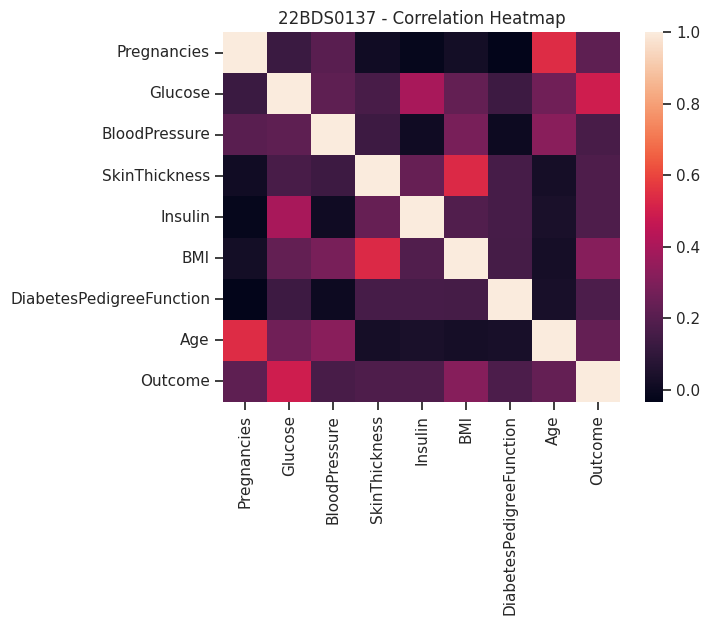

In [89]:
#Correlation
correlation = df.corr(method='pearson')
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns)
plt.title("22BDS0137 - Correlation Heatmap")
plt.show()

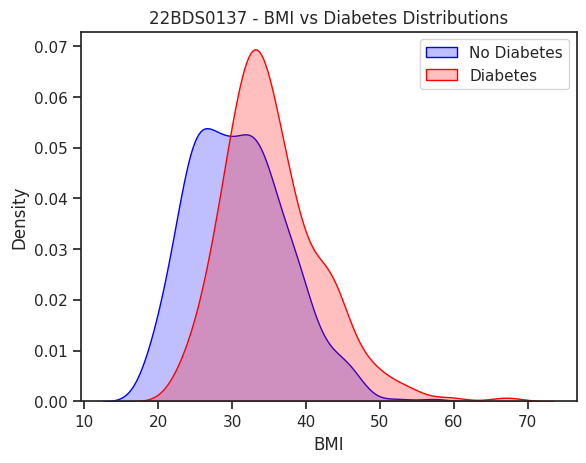

In [90]:
#numerical vs categorical
#Glucose and BMI show highest correlation with output
sns.kdeplot(df[df["Outcome"] == 0]["BMI"], label="No Diabetes", fill=True, color="blue")
sns.kdeplot(df[df["Outcome"] == 1]["BMI"], label="Diabetes", fill=True, color="red")

plt.title("22BDS0137 - BMI vs Diabetes Distributions")
plt.xlabel("BMI")
plt.ylabel("Density")
plt.legend()
plt.show()

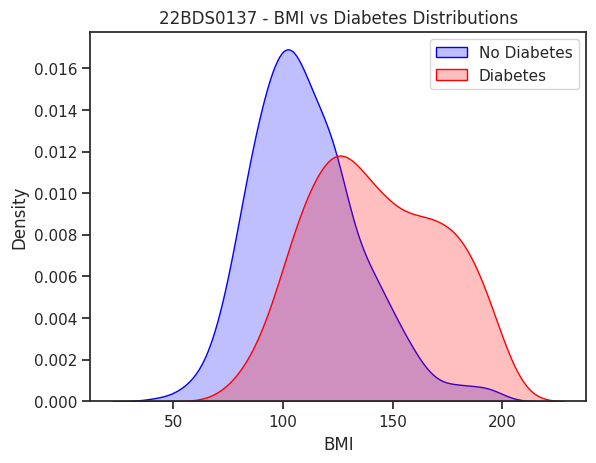

In [91]:
sns.kdeplot(df[df["Outcome"] == 0]["Glucose"], label="No Diabetes", fill=True, color="blue")
sns.kdeplot(df[df["Outcome"] == 1]["Glucose"], label="Diabetes", fill=True, color="red")

plt.title("22BDS0137 - BMI vs Diabetes Distributions")
plt.xlabel("BMI")
plt.ylabel("Density")
plt.legend()
plt.show()

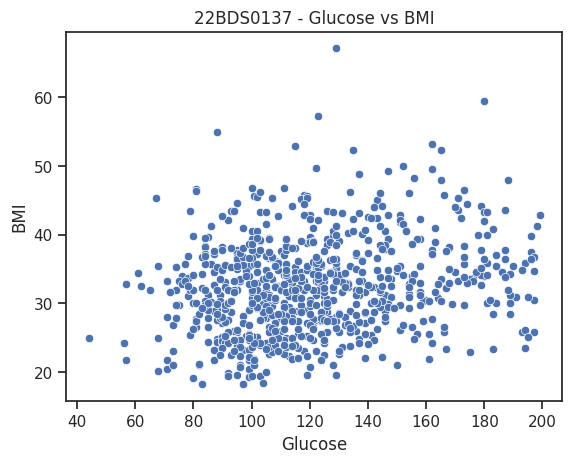

In [92]:
#Numerical vs Numerical
sns.scatterplot(x=df["Glucose"], y=df["BMI"])
plt.title("22BDS0137 - Glucose vs BMI")
plt.show()

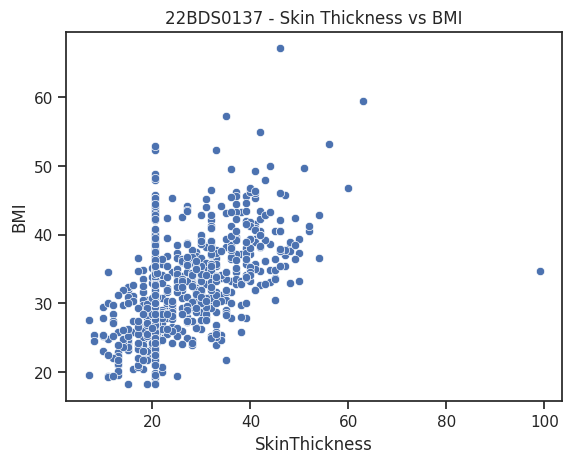

In [93]:
#skin thickness and BMI show high corellation
sns.scatterplot(x=df["SkinThickness"], y=df["BMI"])
plt.title("22BDS0137 - Skin Thickness vs BMI")
plt.show()

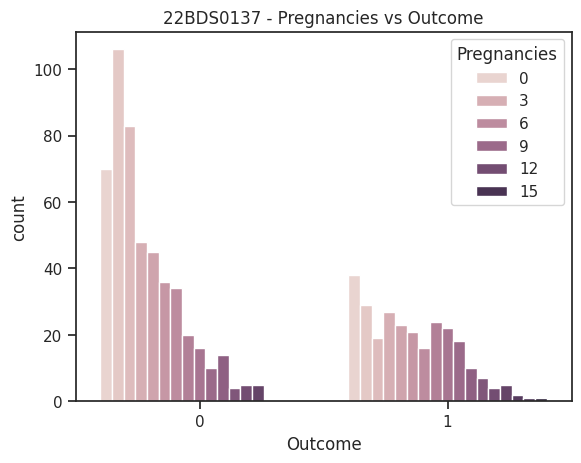

In [94]:
#cat vs cat
sns.countplot(x="Outcome", hue="Pregnancies", data=df)
plt.title("22BDS0137 - Pregnancies vs Outcome")
plt.show()

## Multivariate analysis

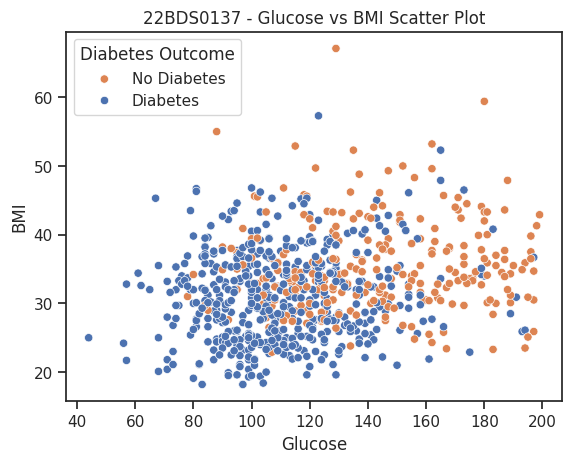

In [95]:
#scatterplot with hue as third dimension (outcome)
sns.scatterplot(df, x="Glucose", y="BMI", hue="Outcome")

plt.title("22BDS0137 - Glucose vs BMI Scatter Plot")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.legend(title="Diabetes Outcome", labels=["No Diabetes", "Diabetes"])
plt.show()

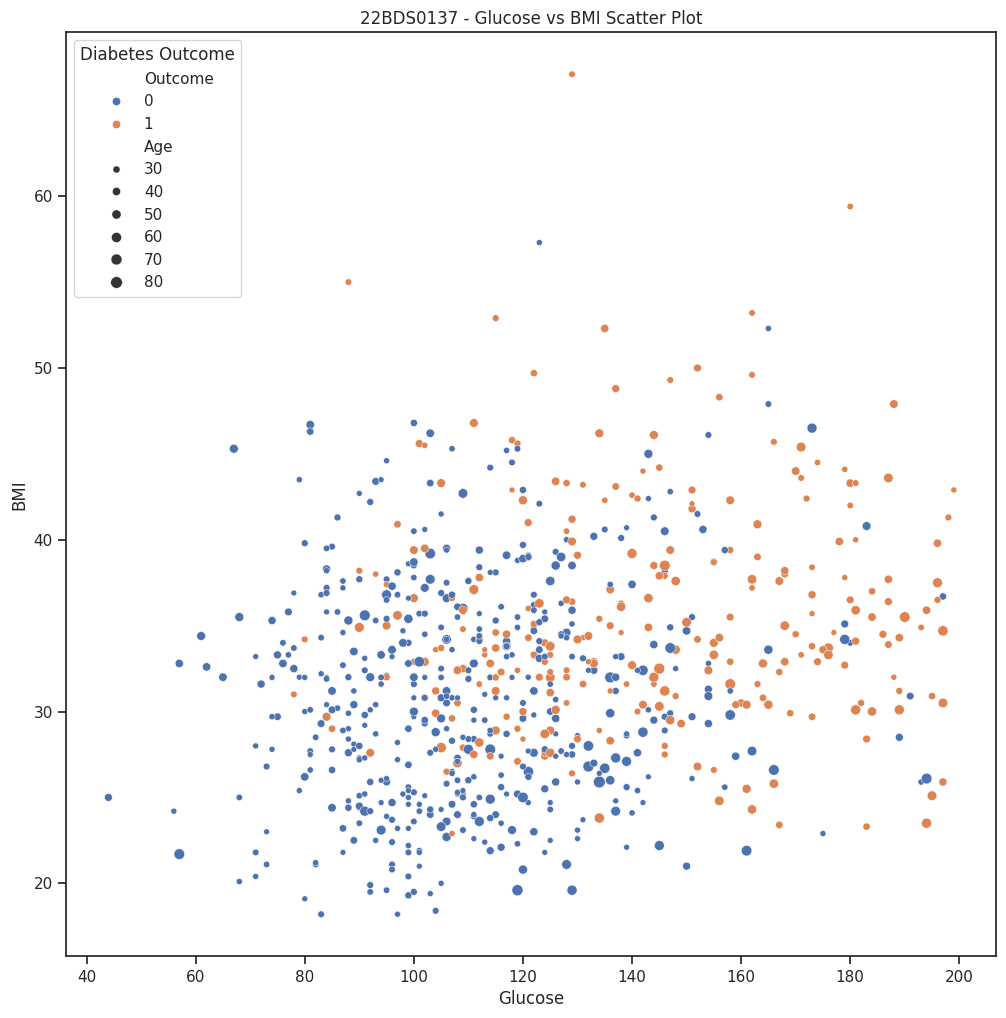

In [96]:
#scatterplot with hue as third dimension (outcome) and size as 4th (age)
plt.figure(figsize=(12, 12))
sns.scatterplot(df, x="Glucose", y="BMI", hue="Outcome", size="Age")
plt.title("22BDS0137 - Glucose vs BMI Scatter Plot")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.legend(title="Diabetes Outcome")
plt.show()


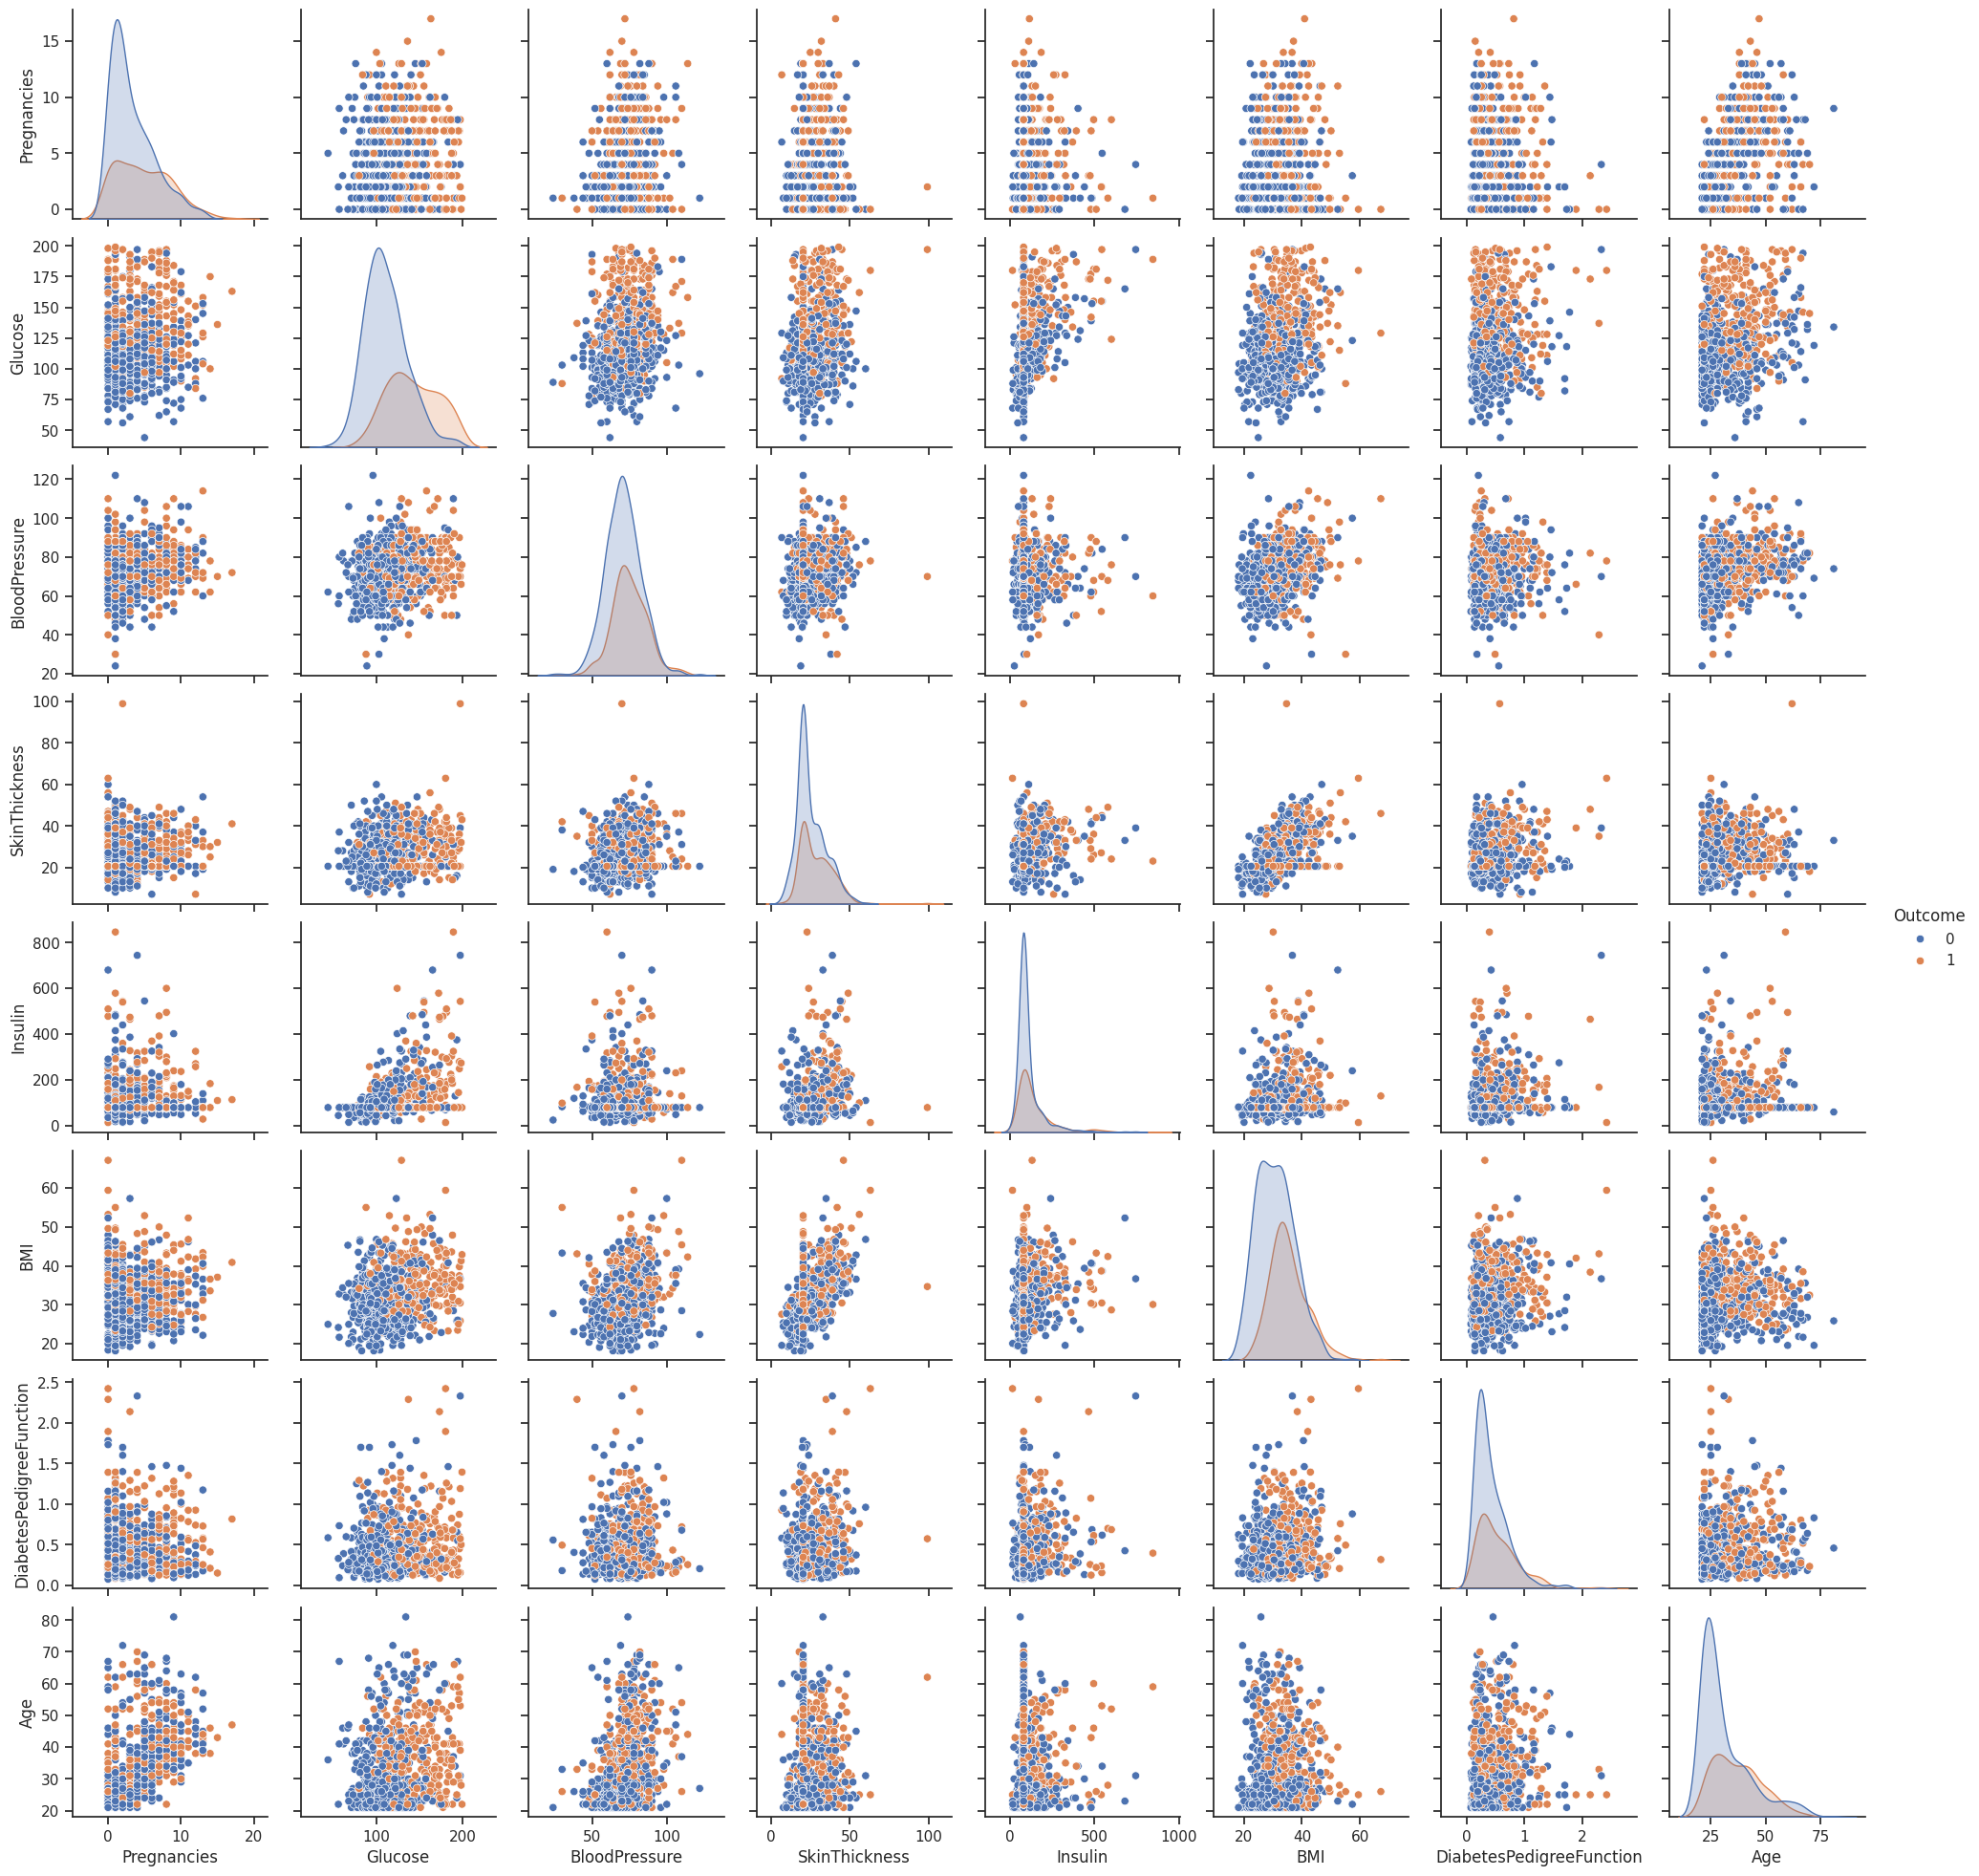

In [97]:
#pairplot with hue as third dimension (outcome)
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, hue="Outcome")
plt.show()